
<div id='id-table'/>

# Libraries and Data

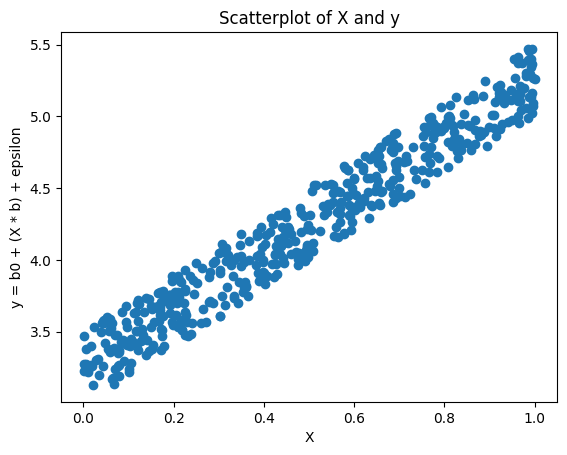

In [9]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# data
X = np.random.rand(500)
epsilon = np.random.rand(500) / 2
b, b0 = 2, 3
y = b0 + (X * b) + epsilon

# scatterplot data
plt.scatter(X, y)
plt.title('Scatterplot of X and y')
plt.xlabel('X')
plt.ylabel('y = b0 + (X * b) + epsilon')
plt.show()

# Linear Regression

---

### Goal
To find the best-fitting line that minimizes the sum of squared differences (residuals) between observed and predicted values.

### Overview
- Supervised learning method used for both continuous and categorical variables.
- Assumes a linear relationship between dependent and independent variables.
- Involves Hyperparameters when regularized (like in Ridge or Lasso regression).
- Sensitive to outliers.
- Requires assumption checks: linearity, independence, homoscedasticity, and normality.

### Steps for the algorithm

**Step 1: Model Representation**  
Choose the form of the function.

**Step 2: Define the Objective Function**  
Sum of squared differences between observed and predicted values (RSS - Residual Sum of Squares).

**Step 3: Minimize the Objective Function**  
Use calculus (for simple linear regression) or numerical methods (for multiple regression) to find the \(\beta\) values that minimize RSS.

**Step 4: Model Evaluation**  
Use metrics such as R-squared, RMSE, etc. to evaluate the fit of the model.

**Step 5: Prediction**  
Use the fitted model to make predictions on new data.

---

### Statistical Model

- A basic linear regression is a statistical model that represents the relationship between predictor variables ***X***<sub>i</sub> with a response variable ***y***<sub>i</sub>. 

- The model assumes a linear relation where the intercept of the line is usually represented by ***$\beta$<sub>0</sub>*** and the slope of the variables by a  coefficient ***$\beta$<sub>i</sub>*** . 

$$ y_i = \beta_{0} + \beta_{1} * X_{1} + ... +\beta_{i} * X_{i} + \varepsilon $$

- The equation can be written in linear algebra notation if a column of 1 is added to the ***X*** matrix:

$$ y_i =  \beta_{i} . X_i + \varepsilon $$

- The predicted values are often called fitted values and symbolized as $\hat{Y}$.

$$ \hat{y}_i =  \hat{\beta_{i}} * X_i $$

- Evaluate with a prediction metric such as:
$$ \text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $$


MSE:  
 0.020049179729144755
intercept:  
 3.266
variable coefficients:  
 [1.978 3.266]


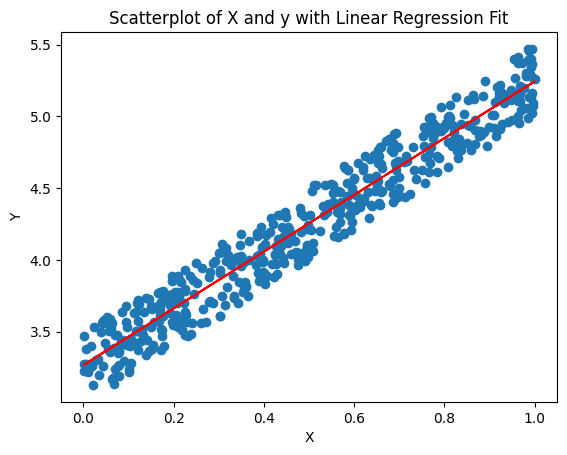

In [10]:
# Linear Regression class:
def simple_linear_regression(X_,y_,intercept:bool = True):
    """linear regression"""
    # if pandas, change to array
    if isinstance(X_, pd.DataFrame):
        X_ = X_.to_numpy()

    if isinstance(y_, pd.DataFrame):
        y_ = y_.to_numpy()

    # number of variables
    num_cols = len(X_.T)

    if intercept:
        # adds 1 for intercept
        X_ = X_.reshape(-1, 1)
        X_ = np.hstack((X_,np.ones([X_.shape[0],1], X_.dtype)))
        
        # coeficients including intercept
        b_ = np.round(np.dot(np.linalg.inv(np.dot(X_.T ,X_)),np.dot(X_.T ,y_)).tolist(),3)
        intercept_ =  b_[-1]
        coef_ = b_[0:num_cols]

    else:
        # coeeficients excluding intercept
        b_ = np.round(
            np.dot(
                np.linalg.inv(
                    np.dot(X_.T ,X_)),
                    np.dot(X_.T ,y_)).tolist(),
            3)
        intercept_ =  0
        coef_ = b_[0:num_cols+1]
        
    # predict values
    y_fitted = np.array(np.dot(X_,b_).tolist())
    
    return intercept_, coef_, y_fitted

# linear regression fit
intercept, coef, y_pred = simple_linear_regression(X_= X, y_= y)

# prints
print('MSE: ','\n',sum((y - y_pred)**2)/len(y))
print('intercept: ','\n',intercept)
print('variable coefficients: ','\n',coef)

# scatterplot data
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title('Scatterplot of X and y with Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Neural Network Representation
---

### Goal
To leverage PyTorch's neural network framework to implement and train a linear regression model.

### Overview
- A single-layer neural network without activation can represent a linear regression model.
- Loss function used is Mean Squared Error (MSE) for regression tasks.
- Gradient descent or its variants (like Adam, SGD) can be used for optimization.

### Steps for the algorithm in PyTorch

**Step 1: Define the Model**  
A simple linear layer with input and output size set to the number of features and 1 respectively.

**Step 2: Define the Loss Function and Optimizer**  
Typically, Mean Squared Error (MSE) is used for regression problems.

**Step 3: Model Training**  
Iterate through data, forward pass, compute loss, backward pass, and update weights.

**Step 4: Model Evaluation**
Use the trained model to make predictions and evaluate them against known targets.

**Step 5: Model Deployment**
With a trained model, you can save and load the model for future predictions on new data.


### Neural Networks with PyTorch

---

## 1. Basics of Neural Networks

Neural Networks consist of layers of interconnected nodes (or neurons). They can be seen as a series of matrix operations, with non-linear activation functions introduced between these operations.

A simple feed-forward neural network can be represented as:

$$
\mathbf{a}^{[l]} = \mathbf{z}^{[l]} + \mathbf{b}^{[l]}
$$
$$
\mathbf{z}^{[l]} = \mathbf{W}^{[l]} \mathbf{a}^{[l-1]}
$$
$$
\mathbf{a}^{[l]} = g^{[l]}(\mathbf{z}^{[l]})
$$

Where:
- $\mathbf{W}^{[l]}$ is the weight matrix for layer \( l \)

- $\mathbf{b}^{[l]}$ is the bias vector for layer \( l \)

- $\mathbf{a}^{[l]}$ is the activation of layer \( l \)

- $g^{[l]}$ is the activation function for layer \( l \)

---

## 2. Activation Functions

But for this example, the linear regression will be used:
$$ Y = \beta_{0} + \beta_{1} * X_{1} + ... +\beta_{n} * X_{n} $$
---

## 3. Loss Functions

$$ \text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $$

---

## 4. Optimization

**Stochastic Gradient Descent (SGD)**:
    $$ \mathbf{W} = \mathbf{W} - \alpha \nabla_{\mathbf{W}} J(\mathbf{W}, \mathbf{b}) $$

Update weights after each training example.

---

## 5. Backpropagation

The key to training a neural network is the backpropagation algorithm, which computes the gradient of the loss with respect to each weight by applying the chain rule.

Given the forward propagation equations above, the gradients can be calculated using the chain rule.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def simple_linear_regression_neural_netwrok(num_epochs,X_,y_,b,b0,num_features=1 , num_outputs = 1, lr=1e-5):
    'Utility function to train the model'
    # Convert inputs and targets to tensors
    X_tensor = torch.from_numpy(X_)
    y_tensor = torch.from_numpy(y_)

    # Changing the data type to float32 as our model accepts float32 data type
    X_tensor = X_tensor.type(torch.float32) 
    y_tensor = y_tensor.type(torch.float32)

    # reshaping our data into n-rows and 1 columns. Model takes 2D array as an input
    X_tensor = X_tensor.reshape(-1,num_features)
    y_tensor = y_tensor.reshape(-1,num_features)

    # linear regression target
    actual_y_tensor = torch.from_numpy(b0 + (X_ * b))
    actual_y_tensor  = actual_y_tensor.type(torch.float32)
    actual_y_tensor  = actual_y_tensor.reshape(-1,num_features)

    # Define linear regression model
    model = nn.Linear(num_features , num_outputs)

    # Define loss function
    loss_fn = F.mse_loss
    loss = loss_fn(model(X_tensor), y_tensor)

    # Define optimizer; lr --> learning rate
    opt = torch.optim.SGD(model.parameters(), lr=lr)

    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        for xb,yb in zip(X_tensor, y_tensor):
            # 1. Generate predictions
            pred = model(xb)
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            # 3. Compute gradients
            loss.backward()
            # 4. Update parameters using gradients
            opt.step()
            # 5. Reset the gradients to zero
            opt.zero_grad()
        #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

    return model(X_tensor)

b = 2.016
b0 = 3.246
y_pred = simple_linear_regression_neural_netwrok(num_epochs = 50,
                                                 X_ = X,
                                                 y_ = y,
                                                 b = b,
                                                 b0 = b0, 
                                                 lr=0.01)
# prints
print('MSE: ','\n',sum((y - [data[0] for data in y_pred.detach().numpy()])**2)/len(y))
print('intercept: ','\n',b0)
print('variable coefficients: ','\n',[b,b0])
print('fitted values: ','\n', [data[0] for data in y_pred.detach().numpy()])

# scatterplot data and linear regression fit
fig = go.Figure()
fig.add_trace(go.Scatter(x=X, y=y, mode='markers', name='Data'))
fig.add_trace(go.Scatter(x=X, y=[data[0] for data in y_pred.detach().numpy()], mode='lines', name='Linear Regression Fit'))
fig.update_layout(title='Scatterplot of X and y with Linear Regression Fit', xaxis_title='X', yaxis_title='Y')